<h1><center><font size="25">Intervalos de predicción para modelos de machine learning aplicados a forecasting</font></center></h1>

<center><b>Joaquín Amat Rodrigo</b></center>

<center><i>Abril 2022</i></center>


+ [**Skforecast: forecasting series temporales con Python y Scikit-learn**](https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html)
+ [**Forecasting de la demanda eléctrica**](https://www.cienciadedatos.net/documentos/py29-forecasting-demanda-energia-electrica-python.html)
+ [**Forecasting de las visitas a una página web**](https://www.cienciadedatos.net/documentos/py37-forecasting-visitas-web-machine-learning.html)
+ [**Forecasting series temporales con gradient boosting: Skforecast, XGBoost, LightGBM y CatBoost**](https://www.cienciadedatos.net/documentos/py39-forecasting-series-temporales-con-skforecast-xgboost-lightgbm-catboost.html)
+ [**Predicción del precio de Bitcoin con Python**](https://www.cienciadedatos.net/documentos/py41-forecasting-criptomoneda-bitcoin-machine-learning-python.html)

## Introducción
<br>

Al tratar de anticipar valores futuros de una serie temporal, la mayoría de los modelos de *forecasting* intentan predecir cuál será el valor más probable, esto se llama *point-forecasting*. Aunque conocer de antemano el valor esperado de una serie temporal es útil en casi todos los casos de negocio, este tipo de predicción no proporciona información sobre la confianza del modelo ni sobre la incertidumbre de sus predicciones.

El *forecasting* probabilístico, a diferencia del *point-forecasting*, es una familia de técnicas que permiten predecir la distribución esperada de la variable respuesta en lugar de un único valor puntual. Este tipo de *forecasting* proporciona información muy valiosa ya que permite crear intervalos de predicción, es decir, el rango de valores donde es más probable que pueda estar el valor real. Más formalmente, un intervalo de predicción define el intervalo dentro del cual se espera encontrar el verdadero valor de la variable respuesta con una determinada probabilidad.

Existen [múltiples formas de estimar intervalos de predicción en modelos de *forecasting*](https://otexts.com/fpp3/prediction-intervals.html), la mayoría de las cuales requieren que los residuos (errores) del modelo sigan una distribución normal. Cuando no se puede asumir esta propiedad, dos alternativas comúnmente utilizadas son el *bootstrapping* y la regresión cuantílica. Para ilustrar cómo la librería [skforecast](https://joaquinamatrodrigo.github.io/skforecast/) permite estimar intervalos de predicción en modelos de *forecasting multi-step* se intenta predecir la demanda de energía para un horizonte de 7 días. Se utilizan dos estrategias diferentes:

+ Intervalos de predicción basados en *bootstrapping* para un modelo de tipo [recursive-multi-step forecaster](https://joaquinamatrodrigo.github.io/skforecast/latest/notebooks/autoregresive-forecaster.html).

+ Intervalos de predicción basados en regresión cuantílica para un modelo de tipo [direct-multi-step forecaster](https://joaquinamatrodrigo.github.io/skforecast/latest/notebooks/direct-multi-step-forecasting.html).
<br>

<script src="https://kit.fontawesome.com/d20edc211b.js" crossorigin="anonymous"></script>

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 6px; padding-bottom: 6px; padding-left: 6px; padding-right: 6px; border-radius: 8px; border-left: 8px solid #ff9100;">

<p class="title">
    <i class="fa-triangle-exclamation fa" style="font-size: 18px; color:#ff9100;"></i>
    <b> &nbsp Warning</b>
</p>

Tal y como describe Rob J Hyndman en su <a href="https://robjhyndman.com/hyndsight/narrow-pi/">blog</a>, en los casos reales, casi todos los intervalos de predicción resultan ser demasiado estrechos. Por ejemplo, intervalos teóricos del 95% solo suelen conseguir una cobertura real de entre el 71% y el 87%. Este fenómeno surge debido a que estos intervalos no contemplan todas las fuentes de incertidumbre que, en el caso de modelos de *forecasting*, suelen ser de 4 tipos:

<ul>
  <li>El término de error aleatorio</li>
    
  <li>Las estimación de parámetros</li>
    
  <li>La elección del modelo</li>
    
  <li>El proceso de predicción de valores futuros</li>
</ul>

Cuando se calculan intervalos de predicción para modelos de series temporales, generalmente solo se tiene en cuenta el primero de ellos. Por lo tanto, es recomendable utilizar datos de test para validar la cobertura real del intervalo y no confiar únicamente en la esperada.

</div>

<br>

<script src="https://kit.fontawesome.com/d20edc211b.js" crossorigin="anonymous"></script>

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 6px; padding-bottom: 6px; padding-left: 6px; padding-right: 6px; border-radius: 8px; border-left: 8px solid #00b8d4;">

<p class="title">
    <i class="fa-circle-exclamation fa" style="font-size: 18px; color:#00b8d4;"></i>
    <b> &nbsp Nota</b>
</p>

Si es la primera vez que usa skforecast, visite <a href="https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html">Skforecast: forecasting de series temporales con Python y Scikit-learn</a> para una introducción rápida.

</div>

<br>

### Intervalos de predicción utilizando bootstrapping de los residuos
<br>

El error en la predicción del siguiente valor de una serie (*one-step-ahead forecast*) se define como $e_t = y_t - \hat{y}_{t|t-1}$. Asumiendo que los errores futuros serán similares a los errores pasados, es posible simular diferentes predicciones tomando muestras de los errores vistos previamente en el pasado (es decir, los residuos) y agregándolos a las predicciones.

<p align="center"><img src="./images/diagram-bootstrapping-prediction-intervals.png" style="width: 700px;"></p>

Al hacer esto repetidamente, se crea una colección de predicciones ligeramente diferentes (posibles caminos futuros), que representan la varianza esperada en el proceso de *forecasting*.

<p align="center"><img src="./images/diagram-bootstrapping-prediction-intervals-2.png" style="width: 500px;"></p>

Finalmente, los intervalos de predicción se crean calculando los percentiles $\alpha/2$ y $1−\alpha/2$ de los datos simulados en cada horizonte de predicción.

<p align="center"><img src="./images/forecasting-intervals.gif" style="width: 800px;"></p>
<br>

La principal ventaja de esta estrategia es que solo requiere de un único modelo para estimar cualquier intervalo. El inconveniente es la necesidad de ejecutar cientos o miles de iteraciones de *bootstrapping* lo cual resulta muy costoso desde el punto de vista computacional y no siempre es posible.

Este tipo de intervalos de predicción se pueden estimar fácilmente utilizando [ForecasterAutoreg](https://joaquinamatrodrigo.github.io/skforecast/latest/api/ForecasterAutoreg.html) y [ForecasterAutoregCustom](https://joaquinamatrodrigo.github.io/skforecast/latest/api/ForecasterAutoregCustom.html).
<br><br>

### Intervalos de predicción utilizando modelos de regresión cuantílica
<br>

A diferencia de los modelos de regresión más comunes, que pretende estimar la media de la variable respuesta dados ciertos valores de las variables predictoras, la regresión cuantílica tiene como objetivo estimar los cuantiles condicionales de la variable respuesta. Para una función de distribución continua, el cuantil $\alpha$ $Q_{\alpha}(x)$ se define como el valor tal que la probabilidad de que $Y$ sea menor que $Q_{\alpha}(x)$ es, para un determinado $X=x$, igual a $\alpha$. Por ejemplo, el 36% de los valores de la población son inferiores al cuantil $Q=0,36$. El cuantil más conocido es el cuantil 50%, más comúnmente conocido como mediana.

Al combinar las predicciones de dos modelos de regresión cuantílica, es posible construir un intervalo donde, cada modelo, estima uno de los límites del intervalo. Por ejemplo, los modelos obtenidos para $Q = 0.1$ y $Q = 0.9$ generan un intervalo de predicción del 80% (90% - 10% = 80%).

Son varios los algoritmos de *machine learning* capaces de modelar cuantiles. Algunos de ellos son:

+ [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html)

+ [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html)

+ [CatBoost](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor)

+ [sklearn GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

+ [sklearn QuantileRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor)

+ [RandomForest de skranger](https://skranger.readthedocs.io/en/stable/index.html)


Así como el error cuadrático se utiliza como función de coste para entrenar modelos que predicen el valor medio, se necesita una función de coste específica para entrenar modelos que predicen cuantiles. La función utilizada con más frecuencia para la regresión de cuantiles se conoce como [*pinball*](https://en.wikipedia.org/wiki/Quantile_regression):


$$\text{pinball}(y, \hat{y}) = \frac{1}{n_{\text{muestras}}} \sum_{i=0}^{n_{\text{muestras}}- 1} \alpha \max(y_i - \hat{y}_i, 0) + (1 - \alpha) \max(\hat{y}_i - y_i, 0)$$

donde $\alpha$ es el cuantil objetivo, $y$ el valor real y $\hat{y}$ la predicción del cuantil.

Se puede observar que el coste difiere según el cuantil evaluado. Cuanto mayor sea el cuantil, más se penalizan las subestimaciones y menos las sobreestimaciones. Al igual que con MSE y MAE, el objetivo es minimizar sus valores (a menor coste, mejor).

Dos desventajas de la regresión por cuantiles en comparación con el método de *bootstrapping* son: que cada cuantil necesita su regresor, y que la regresión por cuantiles no está disponible para todos los tipos de modelos de regresión. Sin embargo, una vez entrenados los modelos, la inferencia es mucho más rápida ya que no se necesita un proceso iterativo.

Este tipo de intervalos de predicción se pueden estimar fácilmente utilizando [ForecasterAutoregMultiOutput](https://joaquinamatrodrigo.github.io/skforecast/latest/api/ForecasterAutoregMultiOutput.html).
<br><br>

## Librerías
<br>

Librerías utilizadas en este documento

In [1]:
# Preprocesado de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12
}
plt.rcParams.update(dark_style)

# Modelado y Forecasting
# ==============================================================================
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.metrics import mean_pinball_loss

# Configuración
# ==============================================================================
import warnings
warnings.filterwarnings('once')
%config Completer.use_jedi = False

## Data
<br>

Los datos utilizados en este documento se han obtenido del paquete de R [tsibbledata](https://tsibbledata.tidyverts.org/reference/vic_elec.html). El conjunto de datos contiene la demanda de electricidad cada 30 minutos del estado de Victoria (Australia), junto con información adicional sobre la temperatura y un indicador de si ese día es festivo. En los siguientes ejemplos, los datos se agregan a nivel diario.

In [2]:
# Descarga de datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/' +
       'data/vic_elec.csv')
data = pd.read_csv(url, sep=',')

# Preprocesado de datos (agregación a frecuencia diaria)
# ==============================================================================
data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%dT%H:%M:%SZ')
data = data.set_index('Time')
data = data.asfreq('30min')
data = data.sort_index()
data = data.drop(columns='Date')
data = data.resample(rule='D', closed='left', label ='right')\
       .agg({'Demand': 'sum', 'Temperature': 'mean', 'Holiday': 'max'})
data.head()

,Demand,Temperature,Holiday
Time,,,
2012-01-01,82531.745918,21.047727,True
2012-01-02,227778.257304,26.578125,True
2012-01-03,275490.988882,31.751042,True
2012-01-04,258955.329422,24.567708,False
2012-01-05,213792.376946,18.191667,False


In [3]:
# Partición de datos en entrenamiento-validación-test
# ==============================================================================
data = data.loc['2012-01-01 00:00:00': '2014-12-30 23:00:00']
end_train = '2013-12-31 23:59:00'
end_validation = '2014-9-30 23:59:00'
data_train = data.loc[: end_train, :].copy()
data_val   = data.loc[end_train:end_validation, :].copy()
data_test  = data.loc[end_validation:, :].copy()

print(f"Fechas entrenamiento : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Fechas validación    : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Fechas test          : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Fechas entrenamiento : 2012-01-01 00:00:00 --- 2013-12-31 00:00:00  (n=731)
Fechas validación    : 2014-01-01 00:00:00 --- 2014-09-30 00:00:00  (n=273)
Fechas test          : 2014-10-01 00:00:00 --- 2014-12-30 00:00:00  (n=91)


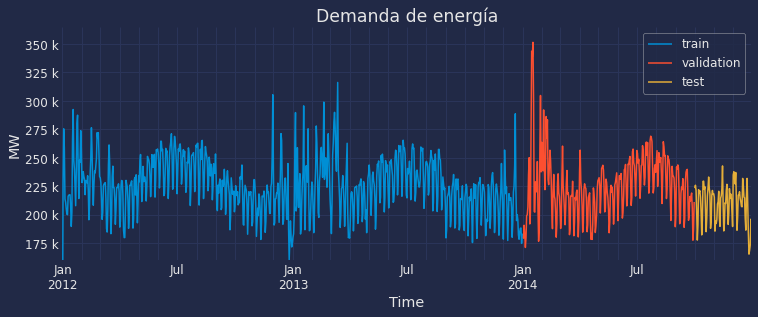

In [4]:
# Gráfico de la serie temporal
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 4))
data_train['Demand'].plot(label='train', ax=ax)
data_val['Demand'].plot(label='validation', ax=ax)
data_test['Demand'].plot(label='test', ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylim(bottom=160_000)
ax.set_ylabel('MW')
ax.set_title('Demanda de energía')
ax.legend();

In [5]:
# Gráfico interactivo de la serie temporal
# ==============================================================================
# data.loc[:end_train, 'partition'] = 'train'
# data.loc[end_train:end_validation, 'partition'] = 'validation'
# data.loc[end_validation:, 'partition'] = 'test'

# fig = px.line(
#     data_frame = data.iloc[1:, :].reset_index(),
#     x      = 'Time',
#     y      = 'Demand',
#     color  = 'partition',
#     title  = 'Demanda energía',
#     width  = 900,
#     height = 500
# )

# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )

# fig.show()

# data=data.drop(columns='partition')

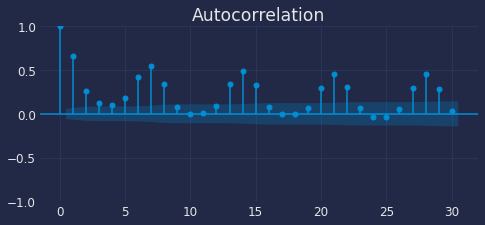

In [6]:
# Gráfico de autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(data.Demand, ax=ax, lags=30)
plt.show()

Teniendo en cuenta el gráfico de autocorrelación, el valor de la demanda de los últimos 7 días podría ser un buen predictor.

## Intervalos de predicción basados en bootstrapping
<br>

Se entrena un *recursive-multi-step forecaster* y se optimizan sus hiperparámetros. Luego, se estiman los intervalos de predicción utilizando bootstrapping.

In [7]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(),
                lags = 7
            )
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor() 
Lags: [1 2 3 4 5 6 7] 
Window size: 7 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2022-04-22 19:07:05 
Last fit date: None 
Skforecast version: 0.4.3 

In order to find the best value for the hyper-parameters, a [grid search](https://joaquinamatrodrigo.github.io/skforecast/latest/notebooks/grid-search-forecaster.html) is carried out. It is important not to include test data in the search, otherwise model overfitting could happen.

In [8]:
# Grid search de hyper-parámetros y lags
# ==============================================================================
# Hyper-parámetros del regresor
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags utilizados como predictores
lags_grid = [7]

results_grid_q10 = grid_search_forecaster(
                            forecaster         = forecaster,
                            y                  = data.loc[:end_validation, 'Demand'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = 7,
                            refit              = True,
                            metric             = 'mean_squared_error',
                            initial_train_size = int(len(data_train)),
                            fixed_train_size   = False,
                            return_best        = True,
                            verbose            = False
                   )

Number of models compared: 12


loop lags_grid: 100%|███████████████████████████████████████| 1/1 [00:46<00:00, 46.66s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 385319031.88926536



Una vez encontrados los mejores hiperparámetros, se aplica un proceso de [*backtesting*](https://joaquinamatrodrigo.github.io/skforecast/latest/notebooks/backtesting.html) para evaluar el desempeño del modelo sobre los datos de test y calcular la cobertura real del intervalo estimado.

In [9]:
# Backtesting
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data['Demand'],
                            initial_train_size = len(data_train) + len(data_val),
                            fixed_train_size   = False,
                            steps      = 7,
                            refit      = True,
                            interval   = [10, 90],
                            n_boot     = 1000,
                            metric     = 'mean_squared_error',
                            verbose    = False
                      )
predictions.head(4)

,pred,lower_bound,upper_bound
2014-10-01,225166.460881,212468.082618,237934.732385
2014-10-02,229586.201508,214144.566479,245619.699520
2014-10-03,228615.742762,213233.590926,250693.382802
2014-10-04,214619.689935,194065.763914,238486.905575


In [10]:
# Cobertura del intervalo en los datos de test
# ==============================================================================
inside_interval = np.where(
                     (data.loc[predictions.index, 'Demand'] >= predictions['lower_bound']) & \
                     (data.loc[predictions.index, 'Demand'] <= predictions['upper_bound']),
                     True,
                     False
                  )

coverage = inside_interval.mean()
print(f"Cobertura del intervalo predicho con los datos de test: {100 * coverage}")

Cobertura del intervalo predicho con los datos de test: 75.82417582417582


La cobertura del intervalo predicho (76%) es ligeramente inferior a la esperada (80%).

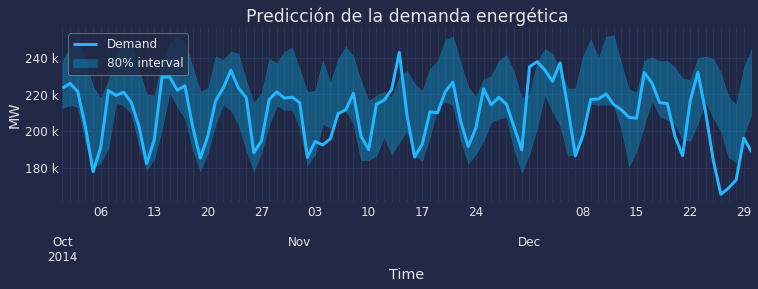

In [11]:
# Gráfico
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 3))
data.loc[end_validation:, 'Demand'].plot(ax=ax, label='Demand', linewidth=3, color="#23b7ff")
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'deepskyblue',
    alpha = 0.3,
    label = '80% interval'
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel('MW')
ax.set_title('Predicción de la demanda energética')
ax.legend();

In [12]:
# Gráfico interactivo
# ==============================================================================
# fig = px.line(
#     data_frame = data.loc[end_validation:, 'Demand'].reset_index(),
#     x      = 'Time',
#     y      = 'Demand',
#     title  = 'Predicción de la demanda energética',
#     width  = 900,
#     height = 500
# )

# fig.add_traces([
#     go.Scatter(
#         x = predictions.index,
#         y = predictions['lower_bound'],
#         mode = 'lines',
#         line_color = 'rgba(0,0,0,0)',
#         showlegend = False
#     ),
#     go.Scatter(
#         x = predictions.index,
#         y = predictions['upper_bound'],
#         mode = 'lines',
#         line_color = 'rgba(0,0,0,0)',
#         fill='tonexty',
#         fillcolor = 'rgba(255, 0, 0, 0.2)',
#         showlegend = False
#     )]
# )
   
# fig.show()

Por defecto, se utilizan los residuos de entrenamiento para estimar los intervalos de predicción. Sin embargo, se pueden utilizar otros residuos, por ejemplo, los obtenidos a partir de un conjunto de validación. Para hacer esto, los nuevos residuos deben almacenarse dentro del forecaster usando el método `set_out_sample_residuals`. Una vez que se hayan agregado los nuevos residuales al forecaster, solo hay que indicar `in_sample_residuals = False` cuando se usa el método `predict_interval`.

## Modelos de regresión por cuantiles
<br>

Al igual que en el ejemplo anterior, se estima un intervalo de predicción del 80% para los siguientes 7 días pero, esta vez, utilizando la estrategia de regresión por cuantiles. En este ejemplo, se entrena un modelo de *gradient boosting LightGBM*, sin embargo, el lector puede utilizar cualquier otro modelo simplemente reemplazando la definición del regresor.

In [13]:
# Crear forecasters: uno para cada límite del intervalo
# ==============================================================================
# Los forecasters obtenidos para alpha=0.1 y alpha=0.9 producen un intervalo de
# confianza del 80% (90% - 10% = 80%).

# Forecaster para cuantil 10%
forecaster_q10 = ForecasterAutoregMultiOutput(
                    regressor = LGBMRegressor(
                                    objective     = 'quantile',
                                    metric        = 'quantile',
                                    alpha         = 0.1,
                                    learning_rate = 0.1,
                                    max_depth     = 10,
                                    n_estimators  = 100
                                ),
                    lags = 7,
                    steps = 7
                 )

# Forecaster para cuantil 90%
forecaster_q90 = ForecasterAutoregMultiOutput(
                    regressor = LGBMRegressor(
                                    objective     = 'quantile',
                                    metric        = 'quantile',
                                    alpha         = 0.9,
                                    learning_rate = 0.1,
                                    max_depth     = 10,
                                    n_estimators  = 100
                                ),
                    lags = 7,
                    steps = 7
                 )

Al validar un modelo de regresión por cuantiles, se debe proporcionar una métrica personalizada según el cuantil que se esté estimando. Estas mismas métricas se volverán a utilizar al ajustar los hiperparámetros de cada modelo.

In [14]:
# Función de coste para cada cuantil (pinball_loss)
# ==============================================================================
def mean_pinball_loss_q10(y_true, y_pred):
    '''
    Pinball loss for quantile 10.
    '''
    return mean_pinball_loss(y_true, y_pred, alpha=0.1)


def mean_pinball_loss_q90(y_true, y_pred):
    '''
    Pinball loss for quantile 90.
    '''
    return mean_pinball_loss(y_true, y_pred, alpha=0.9)

In [15]:
# Backtesting con datos de test
# ==============================================================================
metric_q10, predictions_q10 = backtesting_forecaster(
                                    forecaster = forecaster_q10,
                                    y          = data['Demand'],
                                    initial_train_size = len(data_train) + len(data_val),
                                    fixed_train_size   = False,
                                    steps      = 7,
                                    refit      = True,
                                    metric     = mean_pinball_loss_q10,
                                    verbose    = False
                              )

metric_q90, predictions_q90 = backtesting_forecaster(
                                    forecaster = forecaster_q90,
                                    y          = data['Demand'],
                                    initial_train_size = len(data_train) + len(data_val),
                                    fixed_train_size   = False,
                                    steps      = 7,
                                    refit      = True,
                                    metric     = mean_pinball_loss_q90,
                                    verbose    = False
                              )

Las predicciones generadas por cada modelo se utilizan para definir los límites superior e inferior del intervalo.

In [16]:
# Cobertura del intervalo en los datos de test
# ==============================================================================
inside_interval = np.where(
                     (data.loc[end_validation:, 'Demand'] >= predictions_q10['pred']) & \
                     (data.loc[end_validation:, 'Demand'] <= predictions_q90['pred']),
                     True,
                     False
                  )

coverage = inside_interval.mean()
print(f"Cobertura del intervalo predicho con los datos de test: {100 * coverage}")

Cobertura del intervalo predicho con los datos de test: 59.34065934065934


La cobertura real del intervalo predicho (59%) es muy inferior a la esperada (80%).

Los hiperparámetros del modelo anterior se elegieron sin un criterio concreto, además no hay motivo por el que los mismos hiperparámetros sean adecuados para los diferentes cuantiles. Se lleva a cabo una búsqueda *grid search* para cada forecaster.

In [17]:
# Grid search para los hyper-parámetros y lags de cada quantile-forecaster
# ==============================================================================
# Hyper-parametros del regresor
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags utilizados como predictores
lags_grid = [7]

results_grid_q10 = grid_search_forecaster(
                            forecaster         = forecaster_q10,
                            y                  = data.loc[:end_validation, 'Demand'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = 7,
                            refit              = False,
                            metric             = mean_pinball_loss_q10,
                            initial_train_size = int(len(data_train)),
                            fixed_train_size   = False,
                            return_best        = True,
                            verbose            = False
                   )

results_grid_q90 = grid_search_forecaster(
                            forecaster         = forecaster_q90,
                            y                  = data.loc[:end_validation, 'Demand'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = 7,
                            refit              = False,
                            metric             = mean_pinball_loss_q90,
                            initial_train_size = int(len(data_train)),
                            fixed_train_size   = False,
                            return_best        = True,
                            verbose            = False
                   )

Number of models compared: 12


loop lags_grid: 100%|███████████████████████████████████████| 1/1 [00:08<00:00,  8.14s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 2713.0192469016706

Number of models compared: 12


loop lags_grid: 100%|███████████████████████████████████████| 1/1 [00:07<00:00,  7.89s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 4094.3047516967745



Una vez que se han encontrado los mejores hiperparámetros para cada forecaster, se aplica nuevamente un proceso de backtesting utilizando los datos de test.

In [18]:
# Backtesting con datos de test
# ==============================================================================
metric_q10, predictions_q10 = backtesting_forecaster(
                                    forecaster = forecaster_q10,
                                    y          = data['Demand'],
                                    initial_train_size = len(data_train) + len(data_val),
                                    fixed_train_size   = False,
                                    steps      = 7,
                                    refit      = False,
                                    metric     = mean_pinball_loss_q10,
                                    verbose    = False
                              )

metric_q90, predictions_q90 = backtesting_forecaster(
                                    forecaster = forecaster_q90,
                                    y          = data['Demand'],
                                    initial_train_size = len(data_train) + len(data_val),
                                    fixed_train_size   = False,
                                    steps      = 7,
                                    refit      = False,
                                    metric     = mean_pinball_loss_q90,
                                    verbose    = False
                              )

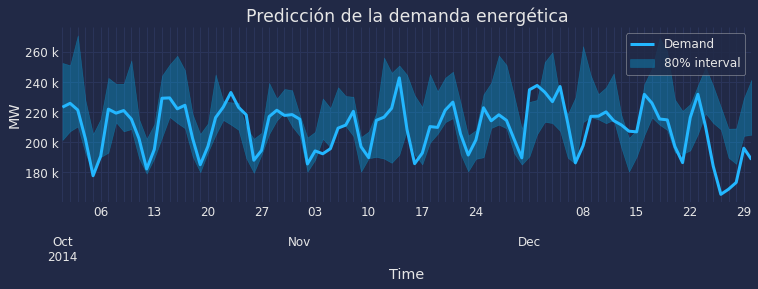

In [19]:
# Gráfico
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 3))
data.loc[end_validation:, 'Demand'].plot(ax=ax, label='Demand', linewidth=3, color="#23b7ff")
ax.fill_between(
    data.loc[end_validation:].index,
    predictions_q10['pred'],
    predictions_q90['pred'],
    color = 'deepskyblue',
    alpha = 0.3,
    label = '80% interval'
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel('MW')
ax.set_title('Predicción de la demanda energética')
ax.legend();

In [20]:
# Cobertura del intervalo en los datos de test
# ==============================================================================
inside_interval = np.where(
                     (data.loc[end_validation:, 'Demand'] >= predictions_q10['pred']) & \
                     (data.loc[end_validation:, 'Demand'] <= predictions_q90['pred']),
                     True,
                     False
                  )

coverage = inside_interval.mean()
print(f"Cobertura del intervalo predicho con los datos de test: {100 * coverage}")

Cobertura del intervalo predicho con los datos de test: 75.82417582417582


Tras optimizar los hiperparámetros de cada forecaster la cobertura se acerca más a la esperada (80%).

## Información de sesión

In [21]:
import session_info
session_info.show(html=False)

-----
lightgbm            3.3.2
matplotlib          3.3.3
numpy               1.21.5
pandas              1.3.5
plotly              5.6.0
session_info        1.0.0
skforecast          0.4.3
sklearn             1.0.2
statsmodels         0.13.0
-----
IPython             7.32.0
jupyter_client      6.1.7
jupyter_core        4.6.3
notebook            6.1.6
-----
Python 3.7.9 (default, Aug 31 2020, 12:42:55) [GCC 7.3.0]
Linux-5.13.0-40-generic-x86_64-with-debian-bullseye-sid
-----
Session information updated at 2022-04-22 19:08


## Bibliografía
<br>

Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. [book](https://otexts.com/fpp3/)

Time Series Analysis and Forecasting with ADAM Ivan Svetunkov [book](https://openforecast.org/adam/)

Python for Finance: Mastering Data-Driven Finance [book](https://www.amazon.es/gp/product/1492024333/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=cienciadedato-21&creative=24630&linkCode=as2&creativeASIN=1492024333&linkId=70c3175ad015970cd1c2328b7a40a055)

Forecasting: theory and practice [PDF](https://arxiv.org/pdf/2012.03854.pdf)

**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Intervalos de predicción para modelos de machine learning aplicados a forecasting by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/py42-intervalos-prediccion-modelos-forecasting-machine-learning.html
    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by  Joaquín Amat Rodrigo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.